# Full Name : Tran Hai Nam

# ID : 11219279

# Class : DSEB 63
****

In [29]:
import pandas as pd
import numpy as np

# Problem 4:

Cho dataset sau: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database. Dùng sklearn:
Chia tỉ lệ train test data là {0.9; 0.1}, dựng decision tree và tính accuracy cho tập train và tập test. 
Visualize cây bằng sklearn.tree.plot_tree() 

In [33]:
data = pd.read_csv(r"D:\NEU\Năm 3\ML\GitHub ML\Machine-Learning-1\Decision_Tree\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Split Data

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y_full = data['Outcome']
X_full = data.drop(columns='Outcome')

X_train, X_test, y_train, y_test = train_test_split( X_full, y_full, train_size=0.9, test_size=0.1, random_state=0)

### Model train

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [44]:
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)

print('-' * 50)
print('Accuracy on train set: {:.4f}'.format(accuracy_train * 100))
print('-' * 50)
print('Accuracy on test set: {:.4f}'.format(accuracy_test * 100))

--------------------------------------------------
Accuracy on train set: 76.9899
--------------------------------------------------
Accuracy on test set: 79.2208


### Tree visualization

[Text(0.5, 0.875, 'Glucose <= 127.5\nentropy = 0.934\nsamples = 691\nvalue = [449, 242]'),
 Text(0.25, 0.625, 'Age <= 28.5\nentropy = 0.728\nsamples = 438\nvalue = [349, 89]'),
 Text(0.125, 0.375, 'BMI <= 30.95\nentropy = 0.399\nsamples = 240\nvalue = [221, 19]'),
 Text(0.0625, 0.125, 'entropy = 0.111\nsamples = 135\nvalue = [133, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.639\nsamples = 105\nvalue = [88, 17]'),
 Text(0.375, 0.375, 'BMI <= 26.35\nentropy = 0.937\nsamples = 198\nvalue = [128, 70]'),
 Text(0.3125, 0.125, 'entropy = 0.187\nsamples = 35\nvalue = [34, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.983\nsamples = 163\nvalue = [94, 69]'),
 Text(0.75, 0.625, 'BMI <= 29.95\nentropy = 0.968\nsamples = 253\nvalue = [100, 153]'),
 Text(0.625, 0.375, 'Glucose <= 145.5\nentropy = 0.855\nsamples = 68\nvalue = [49, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.422\nsamples = 35\nvalue = [32, 3]'),
 Text(0.6875, 0.125, 'entropy = 0.999\nsamples = 33\nvalue = [17, 16]'),
 Text(0.875, 0.375, 'Glucose <

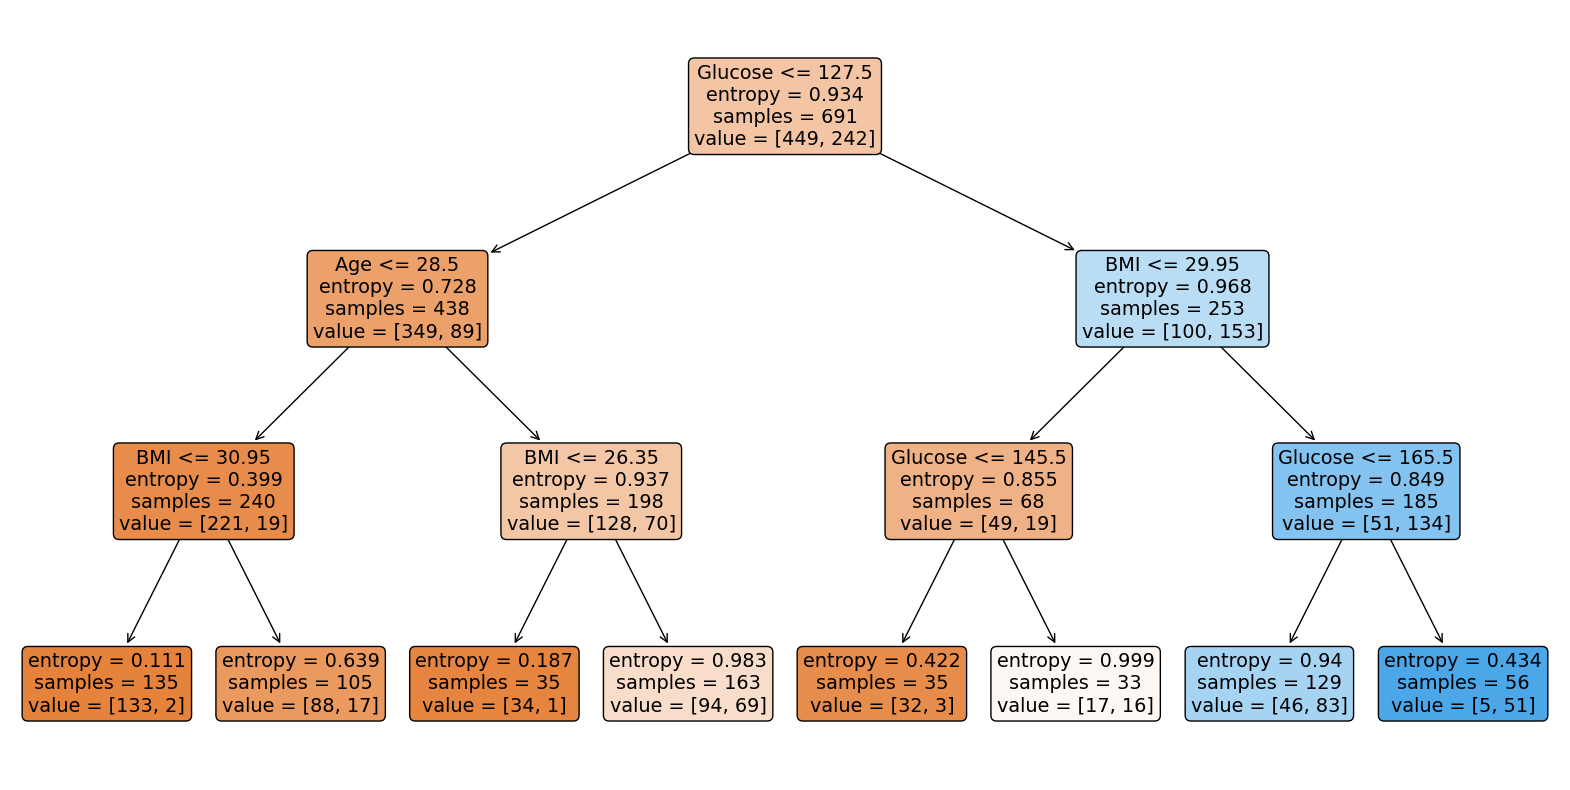

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=X_full.columns, filled=True, rounded=True)